Name: MD Nafiul Bhuiyan ID: 2044851019

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/MyDrive/Machine Learning Lab/Lab Project/Dataset'


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming your dataset is in:
# '/content/drive/MyDrive/Machine Learning Lab/Lab Project/Dataset'
# Update this path if necessary.
dataset_path = '/content/drive/MyDrive/Machine Learning Lab/Lab Project/Dataset'

# Create an ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,  # Use the dataset_path variable here
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Create validation data generator
validation_generator = train_datagen.flow_from_directory(
    dataset_path,  # Use the dataset_path variable here
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
!pip install Pillow  # Make sure Pillow is installed for image processing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from PIL import Image
import os
import numpy as np

# Prepare data
X = []  # to store flattened images
y = []  # to store labels

# Use the correct dataset path from your Google Drive:
dataset_path = '/content/drive/MyDrive/Machine Learning Lab/Lab Project/Dataset'

# Check if the dataset path exists
if not os.path.exists(dataset_path):
    print(f"Error: Dataset path '{dataset_path}' does not exist.")
else:
    for folder in os.listdir(dataset_path):
        label = folder
        for file in os.listdir(os.path.join(dataset_path, folder)):
            image_path = os.path.join(dataset_path, folder, file)
            try:
                # Try to open and process the image
                image = Image.open(image_path).convert('RGB') # Ensure all images are in RGB format
                image = image.resize((64, 64))
                image = np.array(image).flatten()
                X.append(image)
                y.append(label)
            except (IOError, ValueError) as e:
                # Handle potential errors with image files
                print(f"Error processing image '{image_path}': {e}")

    X = np.array(X)
    y = np.array(y)

    # Check if there are any images loaded
    if len(X) == 0:
        print("Error: No images were loaded from the dataset path.")
    else:
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the Logistic Regression model
        lr_model = LogisticRegression(max_iter=1000)
        lr_model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = lr_model.predict(X_test)
        print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Logistic Regression Accuracy: 0.475


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3053 - loss: 4.0343

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.3031 - loss: 3.9736 - val_accuracy: 0.3000 - val_loss: 1.3785
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3705 - loss: 1.3568 - val_accuracy: 0.3875 - val_loss: 1.2919
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4731 - loss: 1.1808 - val_accuracy: 0.4500 - val_loss: 1.2135
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7810 - loss: 0.7881 - val_accuracy: 0.5625 - val_loss: 1.0649
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8631 - loss: 0.4271 - val_accuracy: 0.5750 - val_loss: 1.0853
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9669 - loss: 0.2025 - val_accuracy: 0.6000 - val_loss: 1.2043
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0593 - val_accuracy: 0.6125 - val_loss: 1.3376
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 1.0000 - loss: 0.0189 - val_accuracy: 0.6125 - val_loss: 1.4596
Epo

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming validation_generator has labels and the CNN model has been trained
val_pred = cnn_model.predict(validation_generator)
val_pred_classes = np.argmax(val_pred, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

print("Confusion Matrix")
print(confusion_matrix(true_classes, val_pred_classes))
print("Classification Report")
print(classification_report(true_classes, val_pred_classes, target_names=class_labels))


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 694ms/step
Confusion Matrix
[[ 7  6  2  5]
 [ 5  5  6  4]
 [ 3  6  4  7]
 [11  2  3  4]]
Classification Report
              precision    recall  f1-score   support

         Bus       0.27      0.35      0.30        20
         Car       0.26      0.25      0.26        20
       Truck       0.27      0.20      0.23        20
  motorcycle       0.20      0.20      0.20        20

    accuracy                           0.25        80
   macro avg       0.25      0.25      0.25        80
weighted avg       0.25      0.25      0.25        80



In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10, callbacks=[early_stopping])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.6250 - val_loss: 1.6684
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.6375 - val_loss: 1.7591
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.6250 - val_loss: 1.7577
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 8.6076e-04 - val_accuracy: 0.6250 - val_loss: 1.7849
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 1.0000 - loss: 8.2350e-04 - val_accuracy: 0.6250 - val_loss: 1.8279
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 6.7174e-04 - val_accuracy: 0.6250 - val_loss: 1.8278


In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(128, 128)):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

image_path = '/content/drive/MyDrive/Machine Learning Lab/Lab Project/Dataset/Car/Image_1.jpg'
processed_image = preprocess_image(image_path)

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(150, 150)): # Change target_size to (150, 150)
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

image_path = '/content/drive/MyDrive/Machine Learning Lab/Lab Project/Dataset/Car/Image_1.jpg'
processed_image = preprocess_image(image_path)

predictions = cnn_model.predict(processed_image) # Change model to cnn_model
predicted_class = np.argmax(predictions, axis=1)
class_indices = {v: k for k, v in train_generator.class_indices.items()}  # Change train_data to train_generator
print(f"Predicted class: {class_indices[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted class: Car


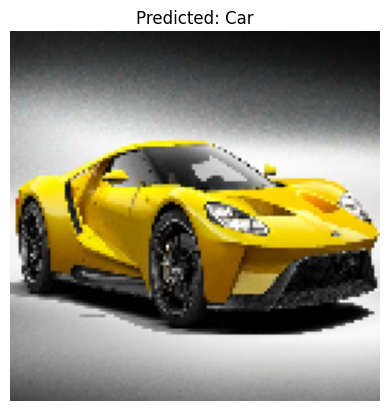

In [17]:
from matplotlib import pyplot as plt

image = load_img(image_path, target_size=(128, 128))
plt.imshow(image)
plt.title(f"Predicted: {class_indices[predicted_class[0]]}")
plt.axis('off')
plt.show()